# Keep-it-dry! SVC PCA Elbow Method
Dataset: ki_ro_ros.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearnex import patch_sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from pprint import pprint

## Data Read

In [2]:
df_train = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
df_test = pd.read_csv('./../Preprocessing/kid_test_ki_ro.csv', index_col=0)

In [3]:
df_train.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,-0.866789,7.0,8.0,9,5,0.000000,0.000000,-0.50,0.191386,0.587838,...,-0.582308,-0.155224,-0.823018,1.817328,-0.416608,-0.826421,-0.996926,-0.798281,0.405153,0.0
1,-0.768774,7.0,8.0,9,5,1.166667,-0.833333,-0.75,0.320974,-0.146396,...,0.783846,1.031983,-0.658824,0.022965,-0.627395,-0.310259,-0.299693,-0.369968,-0.127292,0.0
2,-0.819112,7.0,8.0,9,5,0.833333,-1.166667,-0.25,0.204120,-0.062312,...,0.989231,-0.298507,-0.298414,1.089248,0.777147,1.355888,-0.453893,0.677069,-0.248529,0.0
3,-0.437692,7.0,8.0,9,5,1.000000,-1.000000,0.00,-0.366667,-0.410661,...,0.801538,0.121677,-0.422506,-0.882568,-0.259759,-0.239060,0.601434,0.327001,0.808704,0.0
4,1.342337,7.0,8.0,9,5,0.333333,-1.000000,0.50,1.169663,0.912162,...,-0.840000,0.540156,0.372890,0.374217,0.401703,-1.695250,-0.935963,-0.016735,-0.790371,0.0


In [4]:
df_test_id = df_test[['id']]
df_test.drop(columns=['id', 'product_code', 'product_code_F', 'product_code_G', 'product_code_H', 'product_code_I'], inplace=True)
df_test.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-0.059136,5.0,6.0,6,4,-0.166667,0.166667,0.0,1.138951,-1.168919,...,-0.274792,-0.482308,-0.126795,-0.579540,1.075678,-1.388928,0.417316,-0.634221,0.570330,-0.435202
1,-0.183139,5.0,6.0,6,4,0.666667,0.000000,-1.5,0.073783,0.144144,...,0.265708,0.463846,-1.213362,-0.441432,0.397704,1.314407,0.356512,-0.104508,-1.061511,-1.068447
2,-0.210763,5.0,6.0,6,4,0.166667,0.666667,-0.5,0.517228,-0.941441,...,-0.940954,0.241538,0.519687,-0.571355,-0.419624,-1.599006,-0.148114,1.068135,-0.193578,-0.276961
3,-0.199304,5.0,6.0,6,4,0.166667,0.500000,1.0,-0.948689,-0.635886,...,-0.052233,0.277692,1.155935,-1.554987,-0.406054,-0.081618,-0.184492,-1.209016,-0.152872,-0.696814
4,1.750358,5.0,6.0,6,4,1.166667,1.333333,0.5,0.017603,0.719219,...,0.093868,0.723846,-0.883582,-0.692583,0.120042,0.322214,0.083671,-0.848361,0.317051,0.644913


In [5]:
# Scale
# Scaled already

In [6]:
X_df = df_train[df_train.columns[:-1]]
y_df = df_train[df_train.columns[-1]]

## PCA (Elbow Method)

In [9]:
n_components_range = range(1, 24)  # Adjust the range as needed

# Initialize lists to store explained variance
explained_variance = []

# Perform PCA for each number of components
for n_components in n_components_range:
  pca = PCA(n_components=n_components)
  pca.fit(X_df)
  explained_variance.append(pca.explained_variance_ratio_.sum())

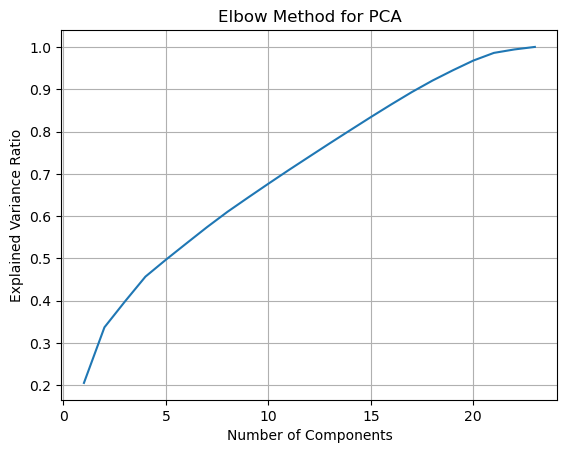

In [10]:
# Plot the explained variance vs. number of components
plt.plot(n_components_range, explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Elbow Method for PCA")
plt.grid(True)
plt.show()

In [11]:
pca = PCA(n_components=16)
X_df_pca = pca.fit_transform(X_df)
df_test_pca = pca.transform(df_test)

## Hyperparameter Tuning using GridSearchCV

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_df_pca, y_df, test_size=.2, random_state=42, stratify=y_df)

In [17]:
# # Define model
# model = LinearSVC(max_iter=1000) 

# # Define hyperparameter grid
# param_grid = {
#     'penalty':['l1', 'l2'],
#     'loss':['squared_hinge', 'hinge'],
#     'C': np.logspace(-2, 2, 10),  # Search for different regularization strengths
# }

# # Define GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')  # Use F1 score for imbalanced data

In [18]:
# GridSearchCV fitting
# grid_search.fit(X_train, y_train)

/home/sobaqov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sobaqov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sobaqov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sobaqov/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sobaqov/anacon

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'loss': ['squared_hinge', 'hinge'],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [19]:
# svc_best = grid_search.best_estimator_
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best f1-score: {grid_search.best_score_}")

Best parameters: {'C': 4.641588833612777, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best f1-score: 0.5372615487167931


In [16]:
svc_best = SVC()
svc_best.fit(X_train, y_train)

SVC()

## Prediction

In [17]:
y_pred = svc_best.predict(df_test_pca)
y_pred_df = pd.DataFrame(y_pred, columns=['failure'])

In [18]:
y_submission = pd.concat([df_test_id, y_pred_df], axis=1)

In [19]:
y_submission.head()

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,1.0


In [20]:
y_submission.to_csv('./../Submission/kid_submission_svc_quicktry.csv', index=False)